# Image Recognition with Convolutional Neural Networks (CNN)
## Dataset: Fashion MNIST

This notebook demonstrates how to build, train, and evaluate a Convolutional Neural Network (CNN) for image recognition using the Fashion MNIST dataset. The notebook includes data augmentation techniques to improve model performance.

### Learning Objectives
By the end of this notebook you will be able to:
1. Understand the fundamental workflow of image recognition with CNNs.
2. Load and preprocess the Fashion MNIST dataset for deep‑learning tasks.
3. Apply data augmentation to improve model generalization.
4. Build a CNN with dropout and batch normalization using TensorFlow / Keras.
5. Train the model and visualize training versus validation performance.
6. Make predictions on unseen images and interpret the results.

**Challenge Goal:** Achieve ≥90% accuracy on Fashion MNIST within 15 epochs.

### 1  Install and Import Required Libraries
The cell below imports all libraries needed throughout the notebook.

In [9]:
# Uncomment the line below if TensorFlow is not installed in your environment
# !pip install tensorflow matplotlib numpy

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist  # Using Fashion MNIST instead of MNIST
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # For data augmentation
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau  # Helpful callbacks

import numpy as np
import matplotlib.pyplot as plt

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.19.0


### 2  Load the Fashion MNIST Dataset
Fashion MNIST is a dataset of Zalando's article images consisting of 60,000 training examples and 10,000 test examples. Each example is a 28x28 grayscale image associated with a label from 10 classes of clothing items.

In [10]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
print(f"Training set shape: {X_train.shape} | Labels: {y_train.shape}")
print(f"Test set shape    : {X_test.shape} | Labels: {y_test.shape}")

# Define class names for Fashion MNIST (for better visualization)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Training set shape: (60000, 28, 28) | Labels: (60000,)
Test set shape    : (10000, 28, 28) | Labels: (10000,)


### 3  Visualize Sample Images
Let's take a look at some sample images from the Fashion MNIST dataset.

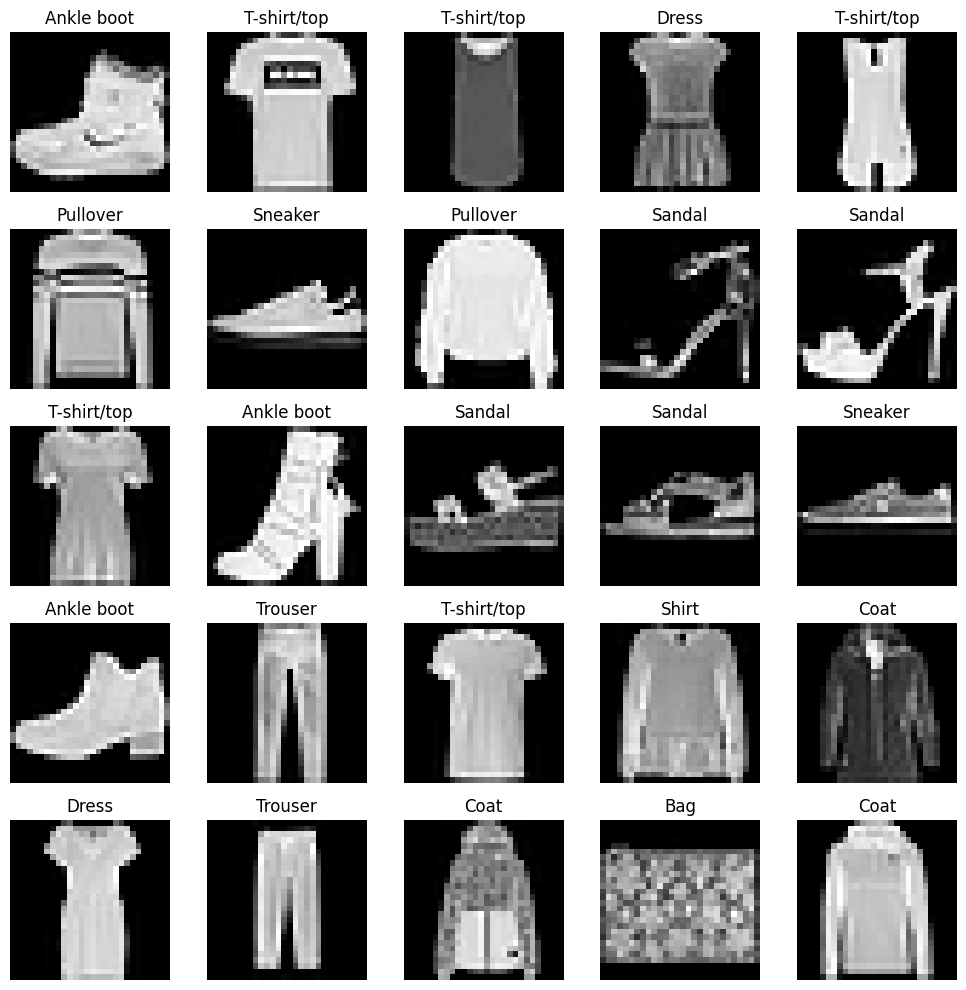

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):  # Show 25 examples (5x5 grid)
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()

### 4  Preprocess Data
1. **Normalize** pixel values from the range 0‑255 to 0‑1 for faster convergence.
2. **One‑hot encode** the labels for categorical classification.
3. **Reshape** images to add a channel dimension expected by CNN layers.

In [12]:
# Normalize
X_train = X_train.astype("float32") / 255.0
X_test  = X_test.astype("float32")  / 255.0

# One‑hot encode labels
y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)

# Reshape to (28, 28, 1)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test  = X_test.reshape(-1, 28, 28, 1)

print("Data ready  ➜", X_train.shape, y_train.shape)

Data ready  ➜ (60000, 28, 28, 1) (60000, 10)


### 5  Data Augmentation
Fashion MNIST is more complex than MNIST. To improve model generalization, we'll apply data augmentation techniques using `ImageDataGenerator`. This creates variations of our training data by applying random transformations like shifts, rotations, and zooms.

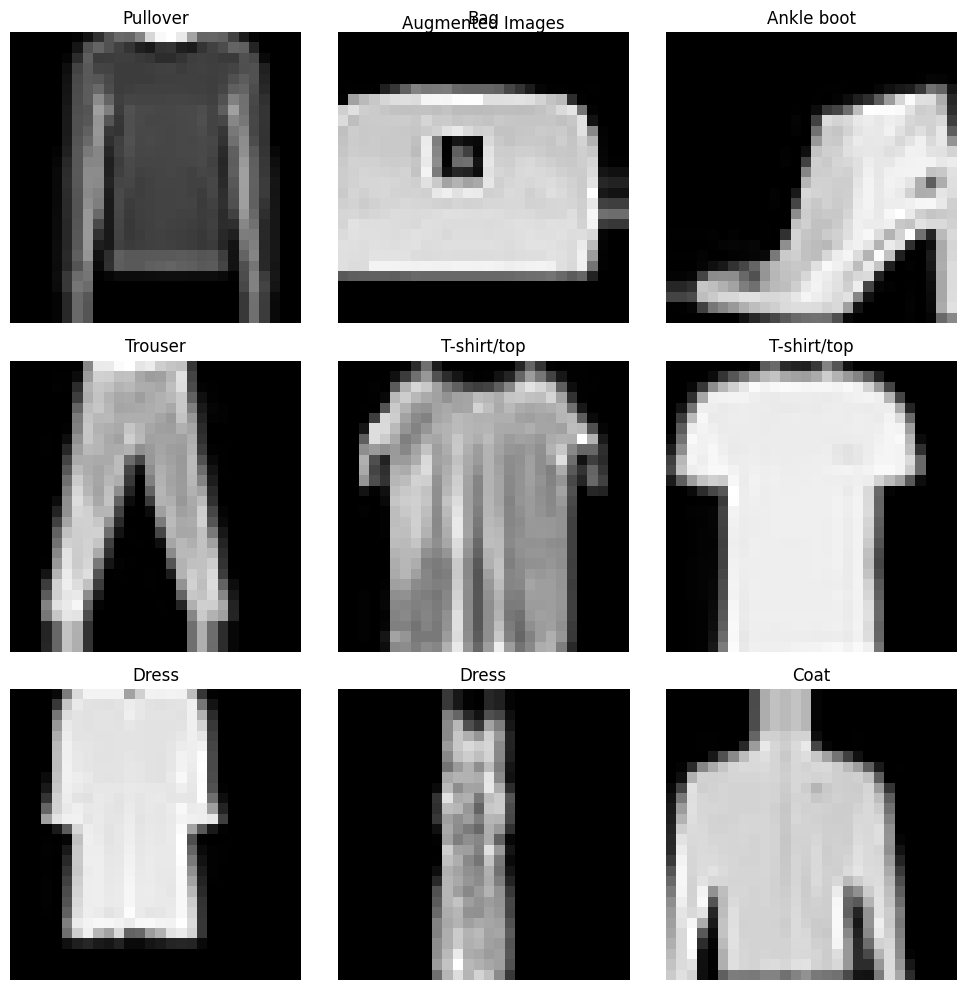

In [20]:
# Create data generator for augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=0.1,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 5%
        width_shift_range=0.1,  # randomly shift images horizontally 5%
        height_shift_range=0.1,  # randomly shift images vertically 5%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)

# Fit the data generator to our training data
datagen.fit(X_train)

# Visualize some augmented images
def show_augmented_images(X_batch, y_batch):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(X_batch[i].reshape(28, 28), cmap='gray')
        plt.title(class_names[np.argmax(y_batch[i])])
        plt.axis('off')
    plt.tight_layout()
    plt.suptitle('Augmented Images')
    plt.show()

# Get a batch of augmented images
X_batch, y_batch = next(datagen.flow(X_train, y_train, batch_size=9))
show_augmented_images(X_batch, y_batch)

### 6  Build the CNN Model with Dropout and Batch Normalization
For Fashion MNIST, we'll use a more robust CNN architecture with regularization techniques to prevent overfitting and improve model performance.

In [19]:
model = models.Sequential([
    # First convolutional block
    layers.Conv2D(64, (3,3), padding='same', input_shape=(28,28,1), activation='relu'),
    layers.MaxPool2D((3,3)),
    layers.Dropout(0.25),
    
    # Second convolutional block
    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    layers.MaxPool2D((2,2), strides=(2,2)),
    layers.Dropout(0.25),
    
    layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation='relu'),
    # Flatten and dense layers
    layers.Flatten(),
    layers.Dense(192, activation='relu'),  # Changed from 128 to 192 units
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')  # 10 classes (clothing items)
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

/Users/fitrakacamarga/project/self/ai_courses/.venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 9, 9, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 9, 9, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 9, 9, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 192)            │       393,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 192)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,930 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 506,762 (1.93 MB)

 Trainable params: 506,762 (1.93 MB)

 Non-trainable params: 0 (0.00 B)

### 7  Set Up Training Callbacks
To improve training efficiency, we'll use callbacks that can:
1. Stop training early if validation accuracy plateaus
2. Reduce learning rate when validation loss plateaus


In [21]:
# Early stopping to prevent overfitting
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=4,              # Number of epochs with no improvement after which to stop
    restore_best_weights=True,
    verbose=1
)

# Reduce learning rate when a metric has stopped improving
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.6,              # Factor by which the learning rate will be reduced
    patience=3,              # Number of epochs with no improvement after which LR will be reduced
    min_lr=0.00001,          # Lower bound on the learning rate
    verbose=1
)

callbacks = [early_stopping, reduce_lr]

### 8  Train the Model with Data Augmentation
We'll train for up to 10 epochs with a batch size of 64, using our data augmentation pipeline.

In [22]:
EPOCHS = 15
BATCH_SIZE = 64

# Train using data augmentation
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=BATCH_SIZE),
    epochs=EPOCHS,
    validation_data=(X_test, y_test),
    callbacks=callbacks
)

Epoch 1/15


/Users/fitrakacamarga/project/self/ai_courses/.venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.6379 - loss: 0.9527 - val_accuracy: 0.8337 - val_loss: 0.4403 - learning_rate: 0.0010
Epoch 2/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.8061 - loss: 0.5165 - val_accuracy: 0.8580 - val_loss: 0.3753 - learning_rate: 0.0010
Epoch 3/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.8322 - loss: 0.4438 - val_accuracy: 0.8713 - val_loss: 0.3404 - learning_rate: 0.0010
Epoch 4/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.8435 - loss: 0.4110 - val_accuracy: 0.8795 - val_loss: 0.3157 - learning_rate: 0.0010
Epoch 5/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.8504 - loss: 0.3922 - val_accuracy: 0.8848 - val_loss: 0.3017 - learning_rate: 0.0010
Epoch 6/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.8626 - loss: 0.3656 - val_accuracy: 0.8918 - val_loss: 0.2878 - learning_rate: 0.0010
Epoch 7/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.8625 - loss: 0.3603

### 9  Evaluate Model Performance
Let's see if we achieved our goal of ≥90% accuracy on Fashion MNIST.

In [25]:
# Final evaluation on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy:.4f}")
# print(f"Challenge goal: ≥0.9000")
# 
if test_accuracy >= 0.9:
    print("🎉 Challenge completed! You've achieved ≥90% accuracy.")
else:
    print(f"Challenge not yet complete. Keep improving your model to reach 90% accuracy.")

Test accuracy: 0.9067
🎉 Challenge completed! You've achieved ≥90% accuracy.


### 10  Visualize Training History
Let's plot the training and validation accuracy and loss over epochs.

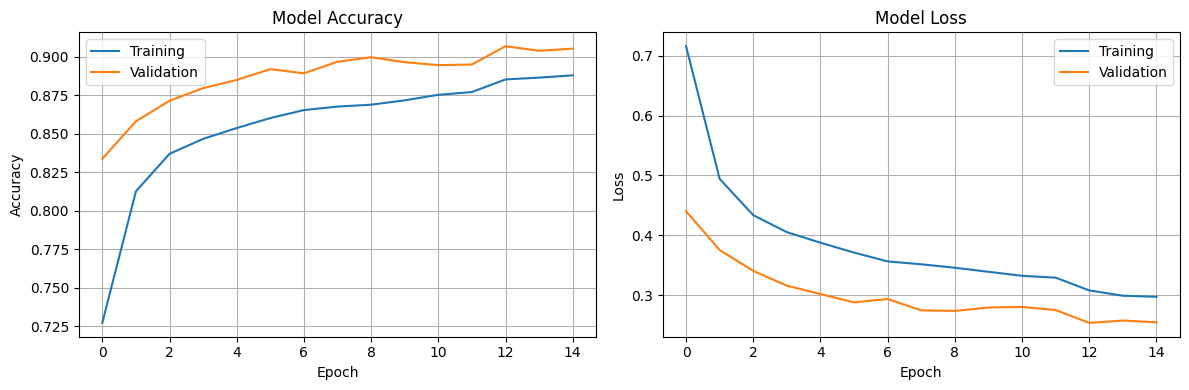

In [26]:
# Plot training & validation accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### 11  Confusion Matrix and Classification Report
To better understand model performance across different clothing categories, let's create a confusion matrix.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


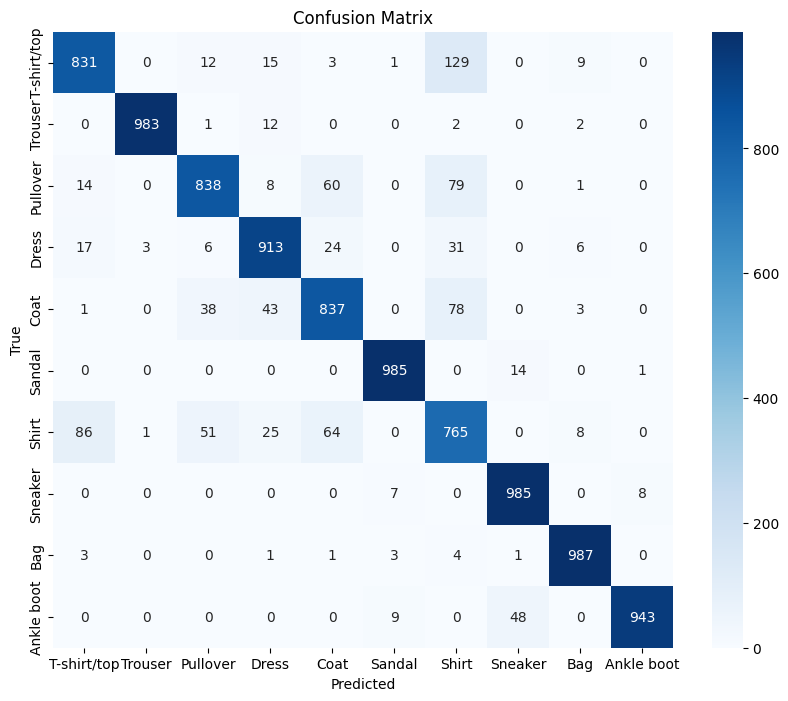

Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.87      0.83      0.85      1000
     Trouser       1.00      0.98      0.99      1000
    Pullover       0.89      0.84      0.86      1000
       Dress       0.90      0.91      0.91      1000
        Coat       0.85      0.84      0.84      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.70      0.77      0.73      1000
     Sneaker       0.94      0.98      0.96      1000
         Bag       0.97      0.99      0.98      1000
  Ankle boot       0.99      0.94      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [27]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Get predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=class_names))

### 12  Visualize Model Predictions
Let's visualize some model predictions on test data, including both correct and incorrect predictions.

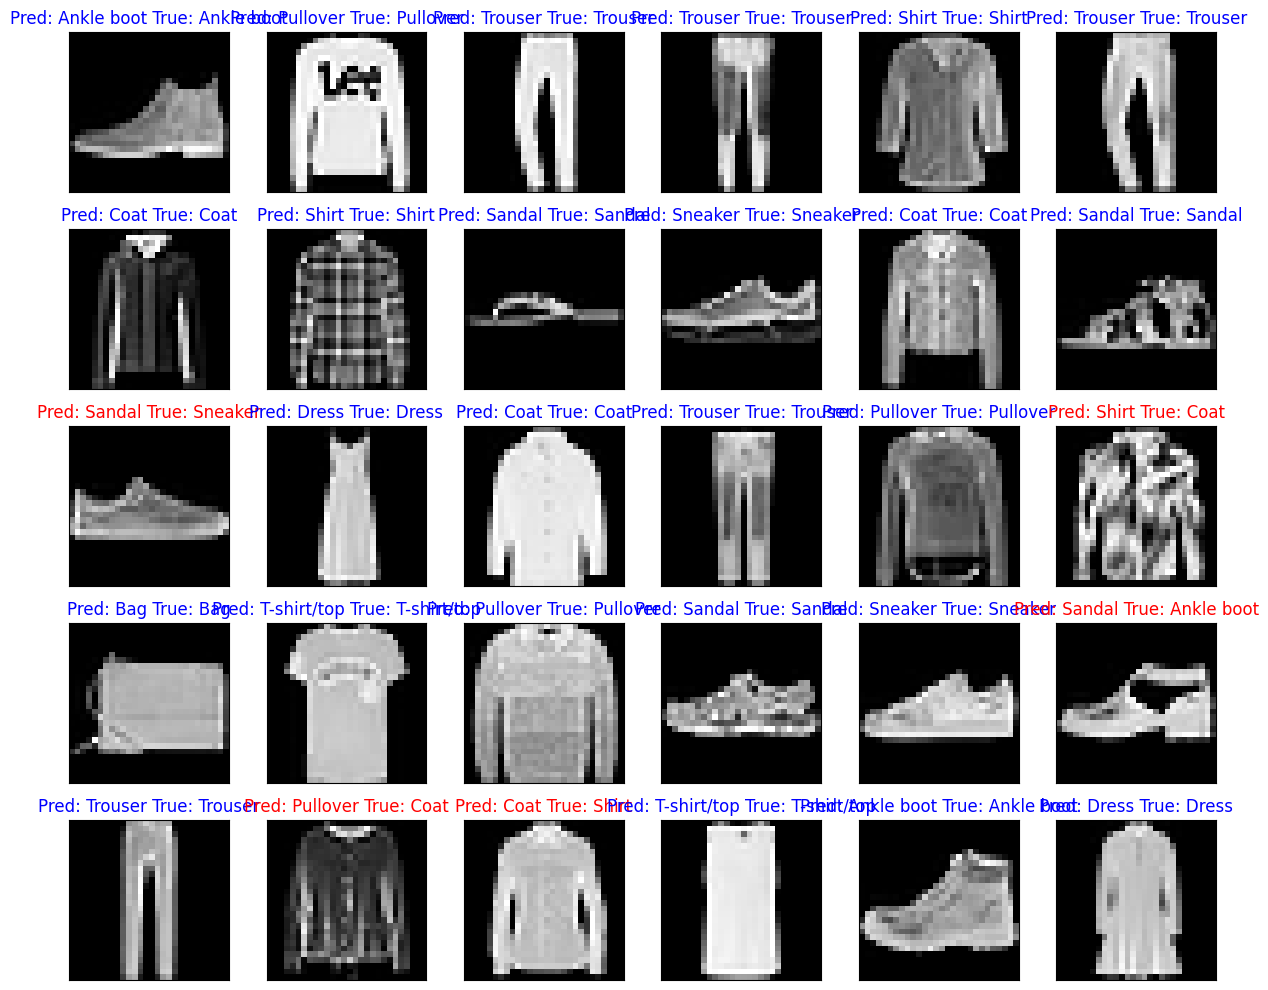

In [28]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = np.argmax(true_label[i]), img[i].reshape(28,28)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap='gray')
    
    predicted_label = np.argmax(predictions_array[i])
    if predicted_label == true_label:
        color = 'blue'  # Correct prediction
    else:
        color = 'red'   # Incorrect prediction
        
    plt.title(f"Pred: {class_names[predicted_label]} True: {class_names[true_label]}", color=color)

# Display a grid of test images with predictions
num_rows = 5
num_cols = 6
num_images = num_rows * num_cols
plt.figure(figsize=(2*num_cols, 2*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, num_cols, i+1)
    plot_image(i, y_pred, y_test, X_test)
    
plt.tight_layout()
plt.show()

### 13  Conclusion and Further Improvements
In this notebook, we've built a CNN model with data augmentation, dropout, and batch normalization to tackle the Fashion MNIST classification problem. The goal was to achieve ≥90% accuracy within 15 epochs.
